<a href="https://colab.research.google.com/github/Vinay-Yadav01/Deep-Learning/blob/main/My_California_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-learn tensorflow matplotlib

Linear Regression:
MSE: 0.5558915986952442
R2 Score: 0.575787706032451


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

Artificial Neural Network:
MSE: 0.2629224010463727
R2 Score: 0.7993585167591561


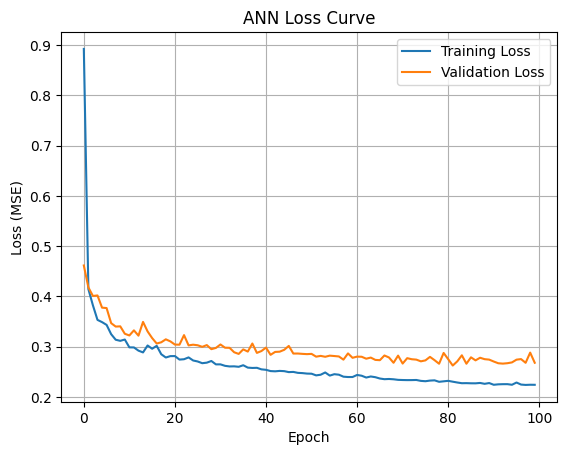

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------------------------
# Linear Regression
# ----------------------------
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)

# ----------------------------
# Artificial Neural Network
# ----------------------------
ann_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

ann_model.compile(optimizer='adam', loss='mse')

# Train the model
history = ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Predictions and evaluation
y_pred_ann = ann_model.predict(X_test_scaled).flatten()
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

print("\nArtificial Neural Network:")
print("MSE:", mse_ann)
print("R2 Score:", r2_ann)

# ----------------------------
# Plotting loss curve for ANN
# ----------------------------
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()
